# Building AI-powered Image search system

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.models import Model
from sklearn.metrics.pairwise import cosine_similarity
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


In [ ]:
# Path to the dataset
dataset_path = '/content/drive/MyDrive/images dataset/Whole dataset'

# Path to save the h5 file
save_path = '/content/drive/MyDrive/images dataset/model.h5'

In [ ]:
# Load the pre-trained VGG16 model
base_model = VGG16(weights='imagenet')
model = Model(inputs=base_model.input, outputs=base_model.get_layer('fc2').output)

553467096/553467096 [==============================] - 6s 0us/step


In [ ]:
# Function to preprocess an image
def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    return img_array


In [ ]:
# Function to extract features from an image
def extract_features(img_path):
    img_array = preprocess_image(img_path)
    features = model.predict(img_array)
    return features

In [ ]:
# Function to get similar images
def get_similar_images(query_image_path, dataset_path, num_similar_images=10):
    # Extract features from the query image
    query_features = extract_features(query_image_path)

    # Initialize lists to store image paths and their cosine similarities
    image_paths = []
    similarities = []

    # Iterate through the images in the dataset
    for filename in os.listdir(dataset_path):
        if filename.endswith(".jpg") or filename.endswith(".png") or filename.endswith(".bmp"):
            img_path = os.path.join(dataset_path, filename)

            # Extract features from the dataset image
            dataset_features = extract_features(img_path)

            # Calculate cosine similarity between query and dataset images
            similarity = cosine_similarity(query_features, dataset_features)[0][0]

            # Add image path and similarity to the lists
            image_paths.append(img_path)
            similarities.append(similarity)

    # Sort the images based on similarity
    sorted_indices = np.argsort(similarities)[::-1]

    # Get the top N similar images
    top_indices = sorted_indices[:num_similar_images]
    similar_images = [image_paths[i] for i in top_indices]

    return similar_images


In [ ]:
# Take an image path as input from the user
query_image_path = input("Enter the path to the query image: ")

# Get similar images
similar_images = get_similar_images(query_image_path, dataset_path)


Enter the path to the query image: /content/drive/MyDrive/images dataset/Whole dataset/bike_232.bmp
1/1 [==============================] - 1s 549ms/step


In [ ]:

# Display the similar images
print("\nSimilar Images:")
for img_path in similar_images:
    print(img_path)

# Save the model
model.save(save_path)
print(f"\nModel saved to {save_path}")


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Similar Images:
/content/drive/MyDrive/images dataset/Whole dataset/bike_232.bmp
/content/drive/MyDrive/images dataset/Whole dataset/bike_174.bmp
/content/drive/MyDrive/images dataset/Whole dataset/bike_299.bmp
/content/drive/MyDrive/images dataset/Whole dataset/bike_230.bmp
/content/drive/MyDrive/images dataset/Whole dataset/bike_171.bmp
/content/drive/MyDrive/images dataset/Whole dataset/bike_205.bmp
/content/drive/MyDrive/images dataset/Whole dataset/bike_180.bmp
/content/drive/MyDrive/images dataset/Whole dataset/bike_179.bmp
/content/drive/MyDrive/images dataset/Whole dataset/bike_302.bmp
/content/drive/MyDrive/images dataset/Whole dataset/bike_186.bmp

Model saved to /content/drive/MyDrive/images dataset/model.h5


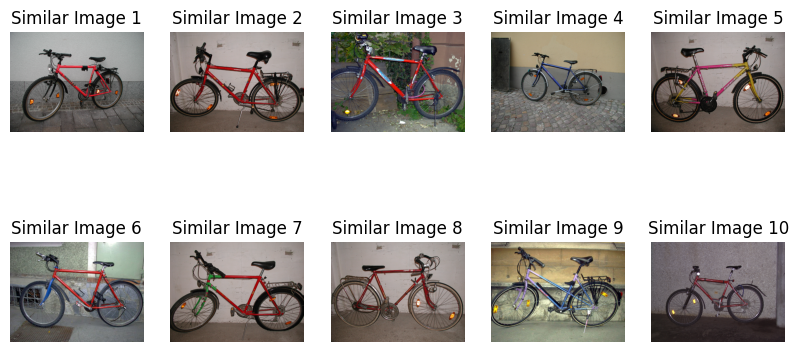

In [ ]:
# Function to plot similar images
def plot_similar_images(query_image_path, similar_images):
    # Plot the query image
    plt.figure(figsize=(10, 5))

    # Create a 2x5 grid of subplots
    for i in range(min(len(similar_images), 10)):
        plt.subplot(2, 5, i + 1)
        plt.imshow(mpimg.imread(similar_images[i]))
        plt.title(f'Similar Image {i + 1}')
        plt.axis('off')

    plt.show()

# Display and save the similar images
plot_similar_images(query_image_path, similar_images)
